# Phoenix 2014 T Dataset

In [1]:
import os
from slr.datasets.Phoenix2014TDataset2 import Phoenix2014TDataset

In [2]:
ds = Phoenix2014TDataset(dataset_dir='/new_home/xzj23/workspace/SLR/data/phoenix2014T', mode='train')

In [3]:
x, y, info = ds.__getitem__(55)

In [4]:
x.shape

torch.Size([80, 3, 260, 210])

In [5]:
print(y)

['MORGEN', 'MITTWOCH', 'SECHSZEHN', 'JUNI', 'WETTER', 'WIE-AUSSEHEN']


In [6]:
info

video                  15June_2010_Tuesday_tagesschau-77/1/*.png
start                                                         -1
end                                                           -1
speaker                                                 Signer01
orth           MORGEN MITTWOCH SECHSZEHN JUNI WETTER WIE-AUSS...
translation    und nun die wettervorhersage für morgen mittwo...
Name: 15June_2010_Tuesday_tagesschau-77, dtype: object

# Data Module

In [7]:
from slr.datasets.Phoenix2014TDataModule2 import Phoenix2014TDataModule
from torchvision.transforms import RandomCrop, CenterCrop, RandomHorizontalFlip, Compose, Resize
from slr.datasets.transforms import ToTensor, TemporalRescale
from slr.datasets.tknzs.simple_tokenizer import SimpleTokenizer

In [8]:
transform = Compose(
    [ToTensor(), Resize((256, 256)), RandomCrop(224)]
)  #, RandomHorizontalFlip(), TemporalRescale(scale=2)])
tokenizer = SimpleTokenizer(vocab_file='/new_home/xzj23/workspace/SLR/slrt/datasets/vocabs/phoenix2014T_gloss_vocab.txt')

dm = Phoenix2014TDataModule(dataset_dir='/new_home/xzj23/workspace/SLR/data/phoenix2014T', batch_size=2, num_workers=10,
                           transform=transform, tokenizer=tokenizer)

In [9]:
dm.setup(stage='fit')
dl = dm.train_dataloader()

In [10]:
# for x, y, x_lgt, y_lgt, info in dl:
#     print(x.shape)

In [11]:
x, y, x_lgt, y_lgt, info = next(iter(dl))

In [12]:
x.shape

torch.Size([2, 166, 3, 224, 224])

In [13]:
x[1,55,2,10,10]

tensor(202.)

In [14]:
x_lgt

[154, 90]

In [15]:
y

tensor([[1118,  573,  665,  466,  792,  665,  604,  466,  322,  341,  665, 1119],
        [1118,  392,  573,  745,  801,  466,  745,  834,  581, 1119, 1116, 1116]])

In [16]:
y_lgt

[12, 10]

In [17]:
print(tokenizer.decode(y[0]))

['<SOS>', 'NACHT', 'REGEN', 'KOENNEN', 'STARK', 'REGEN', 'NORDOST', 'KOENNEN', 'GEFRIEREN', 'GLATT', 'REGEN', '<EOS>']


In [18]:
print(tokenizer.decode(y[1]))

['<SOS>', 'HEUTE', 'NACHT', 'SEHEN', 'STERN', 'KOENNEN', 'SEHEN', 'TEILWEISE', 'NEBEL', '<EOS>', '<PAD>', '<PAD>']


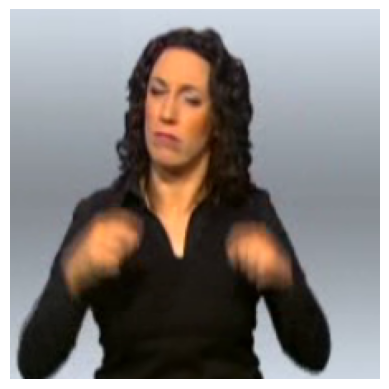

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = x[0,55].numpy().transpose(1, 2, 0)
image = image.astype(np.uint8)
# 在 Jupyter Notebook 中显示图片
plt.imshow(image)
plt.axis('off')  # 关闭坐标轴
plt.show()
